In [4]:
from pathlib       import Path
import sys

sys.path.append(str(Path("../").resolve()))

import pandas             as pd
import numpy              as np
import matplotlib.pyplot  as plt
from astropy.io           import fits

from config_loader        import ConfigLoader
from data_loader          import DataLoader

In [5]:
config = ConfigLoader(str(Path("../configs/config.yaml").resolve()))
data = DataLoader(config, verbosity = 0)

df_eROSITA = data.get_dataframe(config.EROSITA_PATH)
df_H20 = data.get_dataframe(config.H20_PATH)

/opt/anaconda3/envs/H20-xROSITA-Catalog-Matching/lib/python3.12/site-packages/matplotlib/axes/_base.py:2923: RuntimeWarning: overflow encountered in scalar add
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


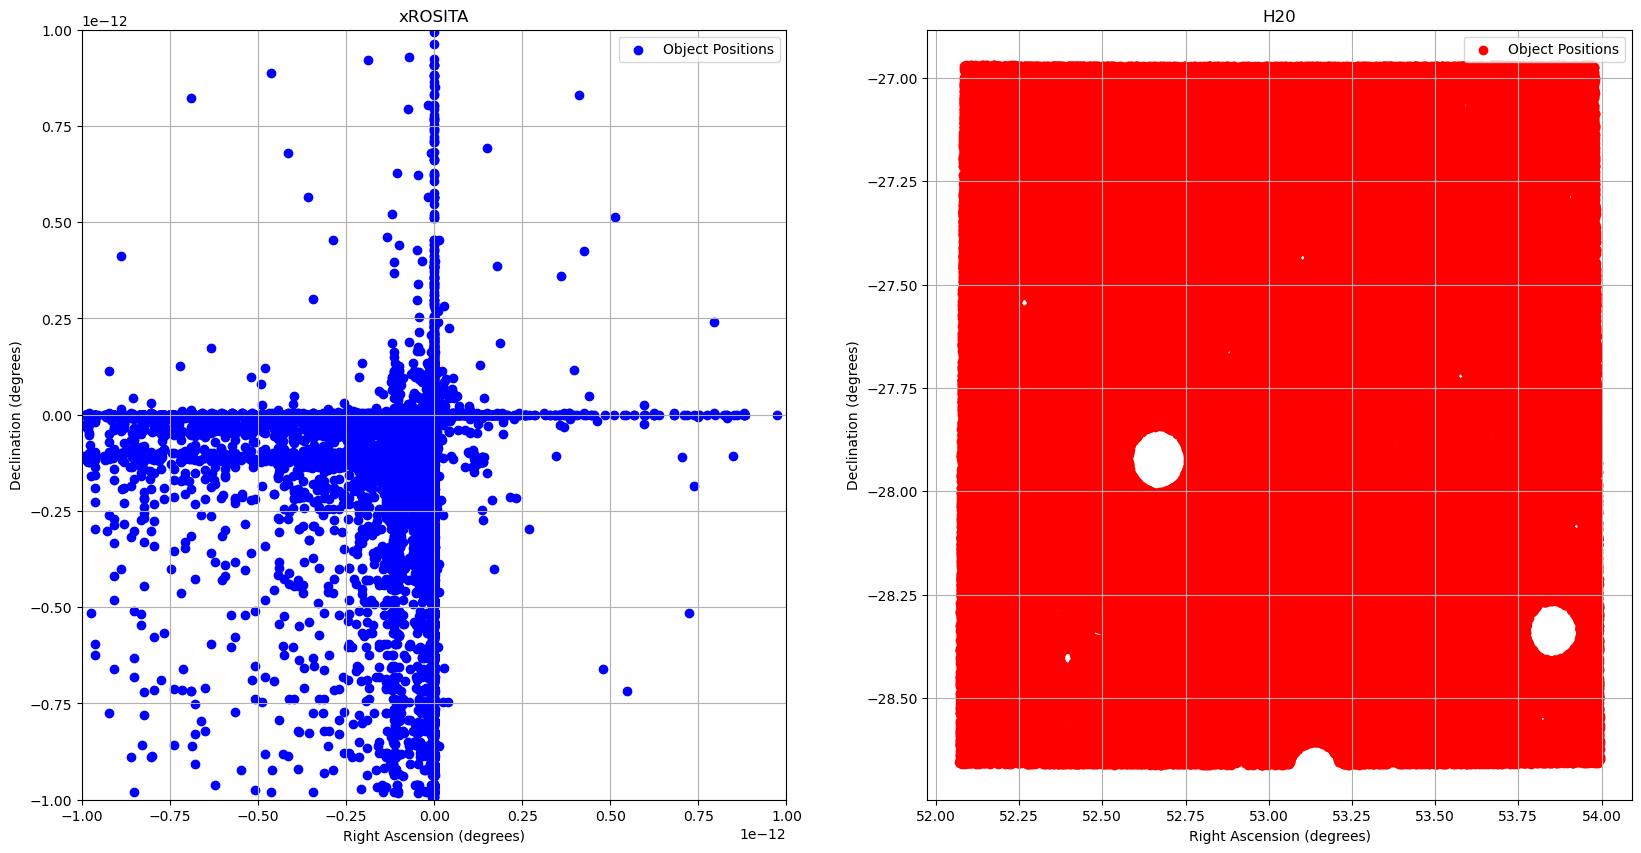

In [6]:

def clean_series(series):
    return series.replace([np.inf, -np.inf], np.nan).dropna()

df_eROSITA_clean = clean_series(df_eROSITA)
df_H20_clean = clean_series(df_H20)

df_eROSITA_RA, df_eROSITA_DEC = df_eROSITA_clean['RA_RAW'], df_eROSITA_clean['DEC_RAW']
df_H20_RA, df_H20_DEC = df_H20_clean['ALPHA_J2000'], df_H20_clean['DELTA_J2000']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.scatter(df_eROSITA_RA, df_eROSITA_DEC, c='blue', label='Object Positions')
ax1.set_title('xROSITA')
ax1.set_xlabel('Right Ascension (degrees)')
ax1.set_ylabel('Declination (degrees)')
ax1.grid(True)
ax1.legend()

ax2.scatter(df_H20_RA, df_H20_DEC, c='red', label='Object Positions')
ax2.set_title('H20')
ax2.set_xlabel('Right Ascension (degrees)')
ax2.set_ylabel('Declination (degrees)')
ax2.grid(True)
ax2.legend()

plt.show()